In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from matplotlib.patches import ConnectionPatch
import plotly as py

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
pd.set_option("display.max_columns",21)
tele=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [263]:
tele["MultipleLines"]=tele["MultipleLines"].replace("No phone service","No")
tele[["MultipleLines","PhoneService"]]

,MultipleLines,PhoneService
0,No,No
1,No,Yes
2,No,Yes
3,No,No
4,No,Yes
...,...,...
7038,Yes,Yes
7039,Yes,Yes
7040,No,No
7041,Yes,Yes


In [264]:
tele["MultipleLines"].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [265]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [266]:
tele2=tele.copy()
tele2["SeniorCitizen"]=tele2["SeniorCitizen"].replace({
    0:"Yes",
    1:"No"
})
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [267]:
#Tenure: Number of months the customer has stayed with the company
#Let's create a new column that reresents the number of years

In [268]:
def years_worked(x):
    if x >=12:
        return str(round((x/12),1)) +" "+"years"
    elif x<12:
        return "less than a year"
tele2["years worked"]=tele2["tenure"].apply(years_worked)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [269]:
tele2[["tenure","years worked"]].head()

,tenure,years worked
0,1,less than a year
1,34,2.8 years
2,2,less than a year
3,45,3.8 years
4,2,less than a year


In [270]:
pd.set_option("display.max_columns",22)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [271]:
tele2["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [272]:
#tele2[tele2["TotalCharges"]==" "]
tele2["TotalCharges"]=tele2["TotalCharges"].replace(" ",np.nan)
tele2.dropna(subset=["TotalCharges"])
tele2["TotalCharges"]=tele2["TotalCharges"].apply(lambda x: float(x))
tele2["TotalCharges"].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

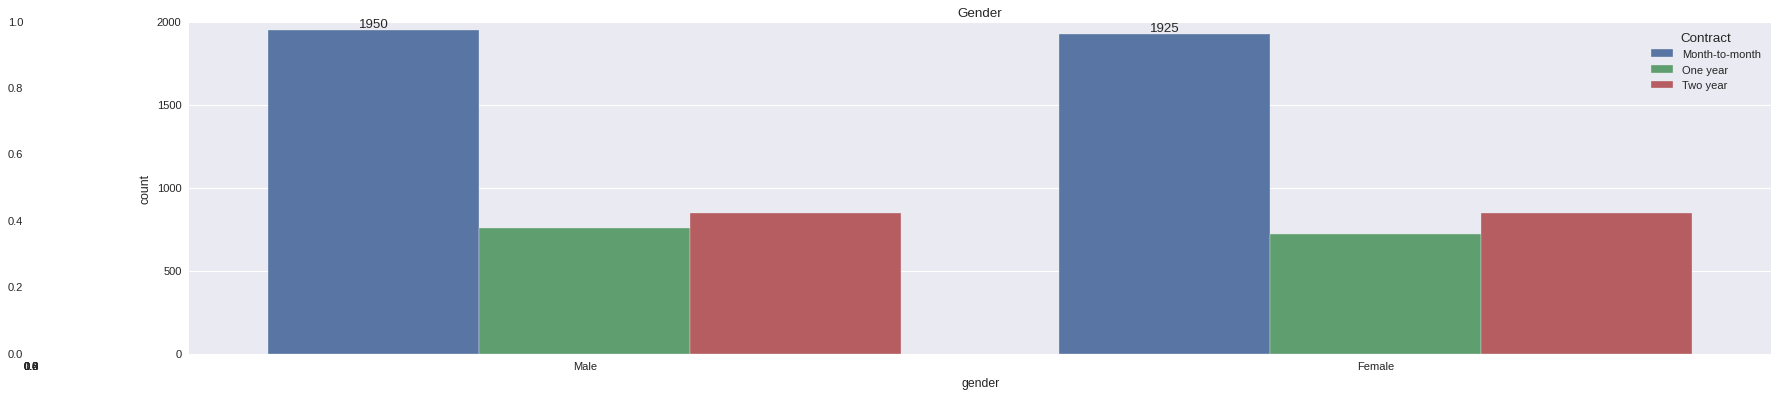

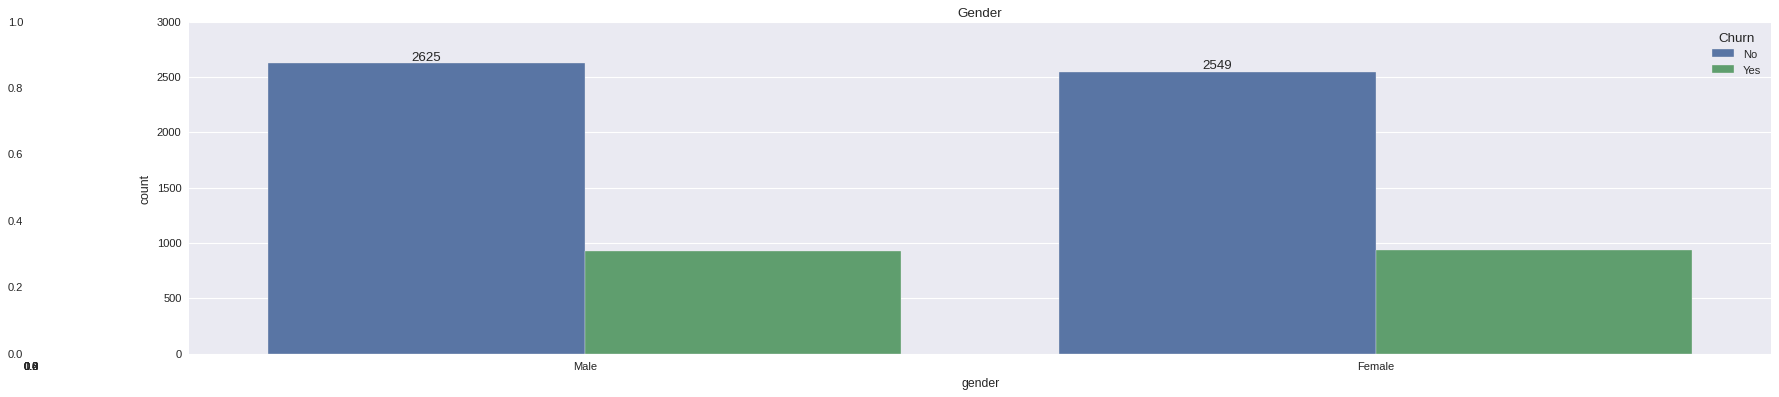

In [273]:
cols=["Contract","Churn"]
for col in cols:
    plt.style.use('seaborn')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "gender", data = tele2, order =  tele2["gender"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'Gender')
    plt.show()






<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

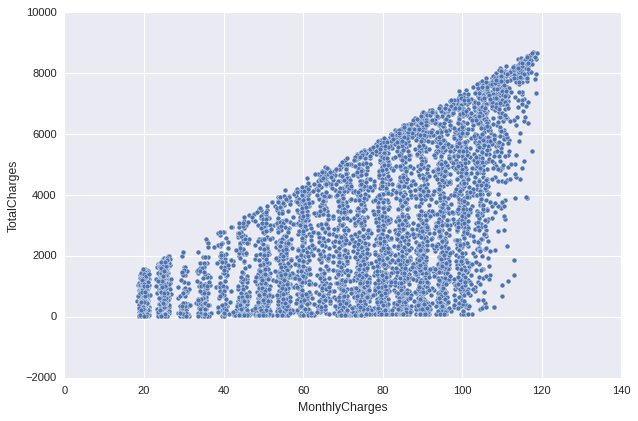

In [274]:

sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=tele2)



<Axes: xlabel='tenure', ylabel='TotalCharges'>

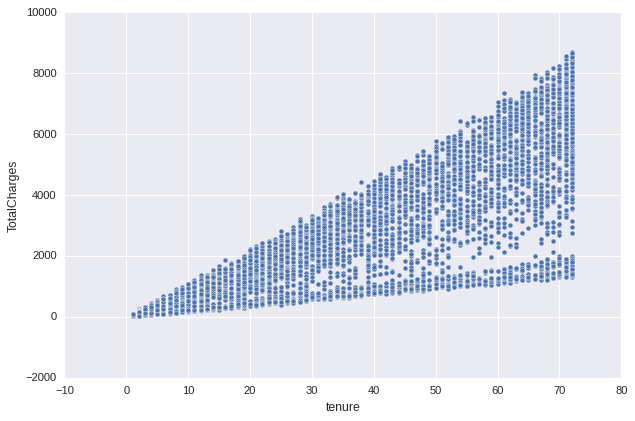

In [275]:
sns.scatterplot(x="tenure",y="TotalCharges",data=tele2)

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

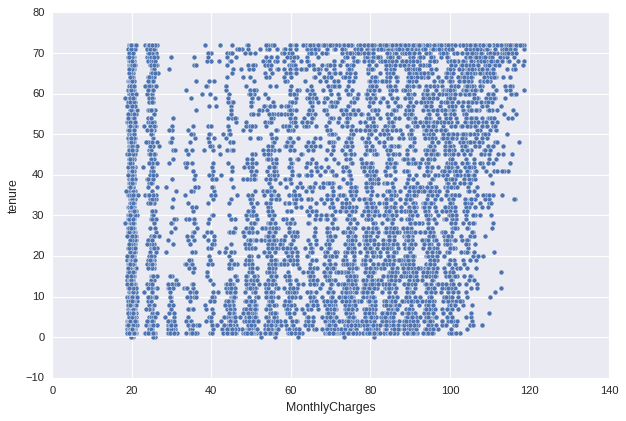

In [276]:
sns.scatterplot(x="MonthlyCharges",y="tenure",data=tele2)

Gender does not heavily affect churn

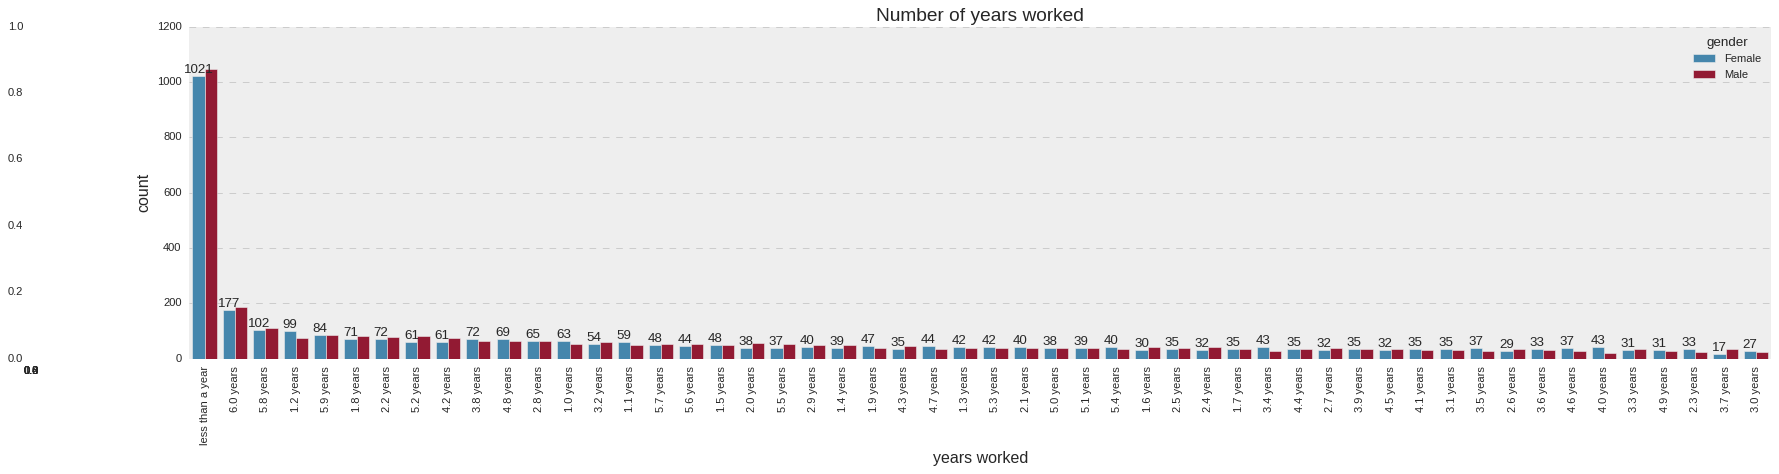

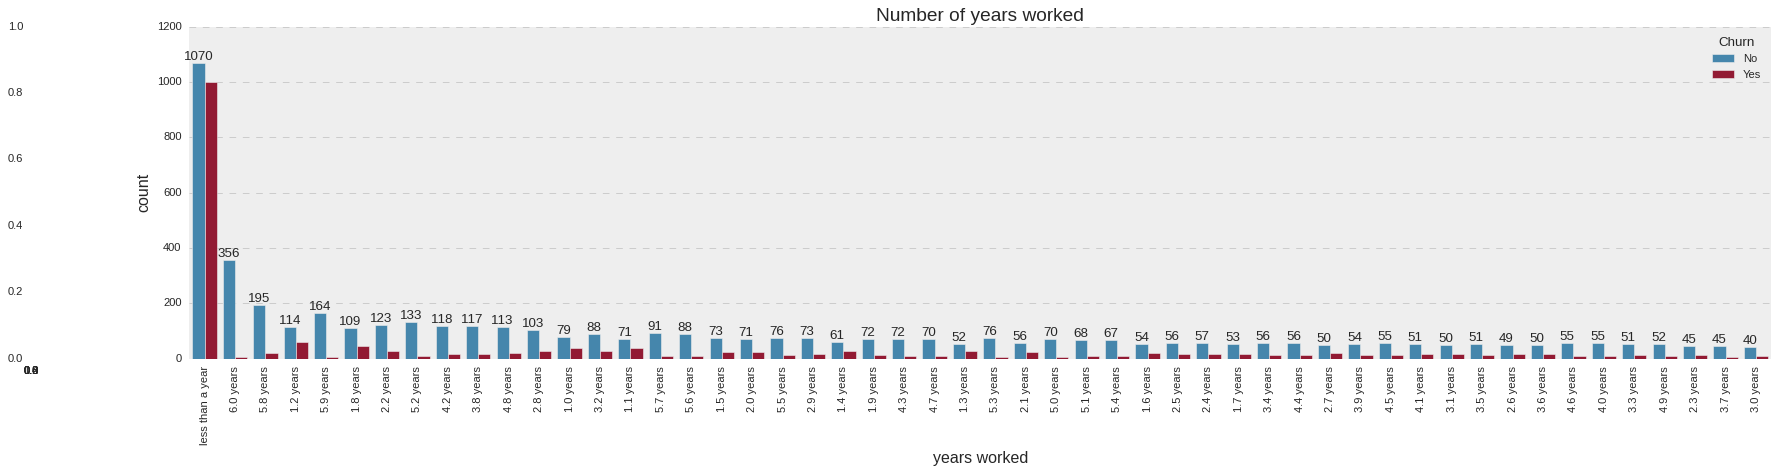

In [277]:
cols=["gender","Churn"]
for col in cols:
    plt.style.use('bmh')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "years worked", data = tele2, order =  tele2["years worked"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Number of years worked')
    plt.show()






People who churn the most are usually newbies who work less than a year

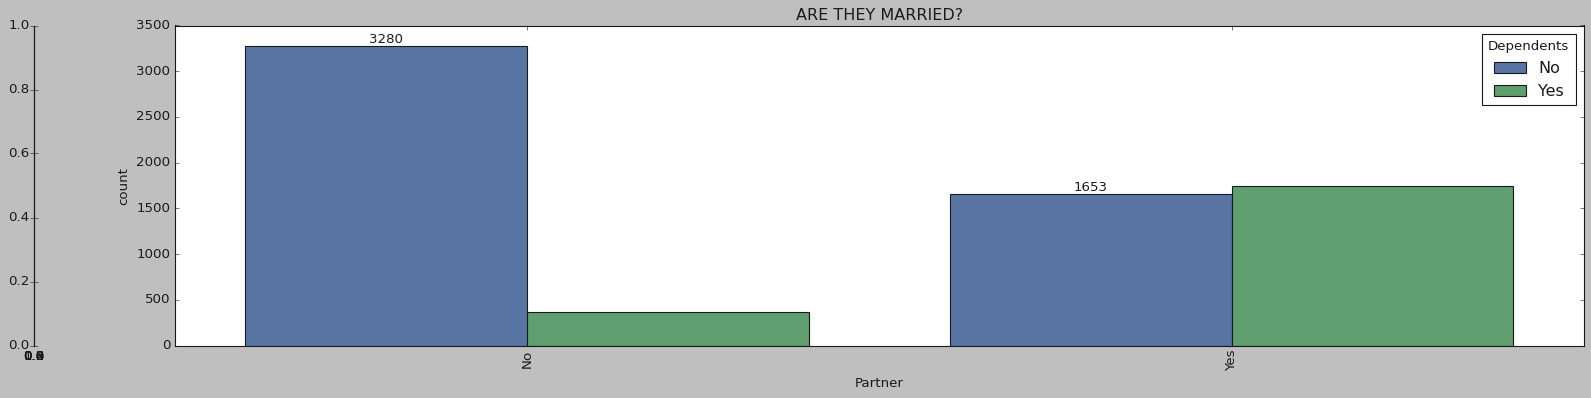

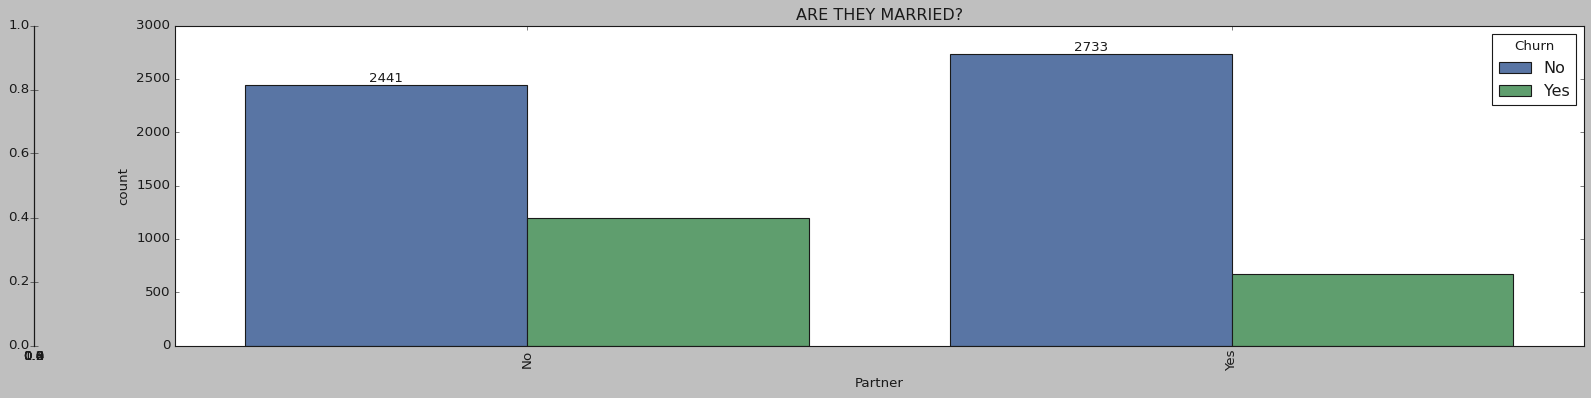

In [278]:
cols=["Dependents","Churn"]
for col in cols:
    plt.style.use('classic')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "Partner", data = tele2, order =  tele2["Partner"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'ARE THEY MARRIED?')
    plt.show()






THOSE WHO ARE MARRIED , CHURN ALOT AS COMPARED TO THOSE WHO ARE NOTMARRIED

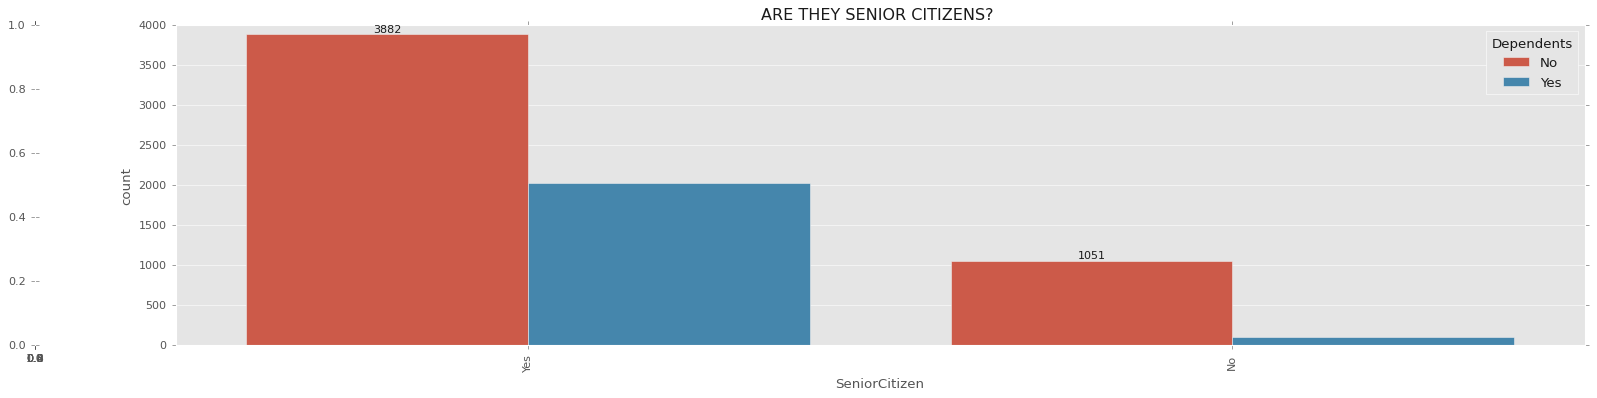

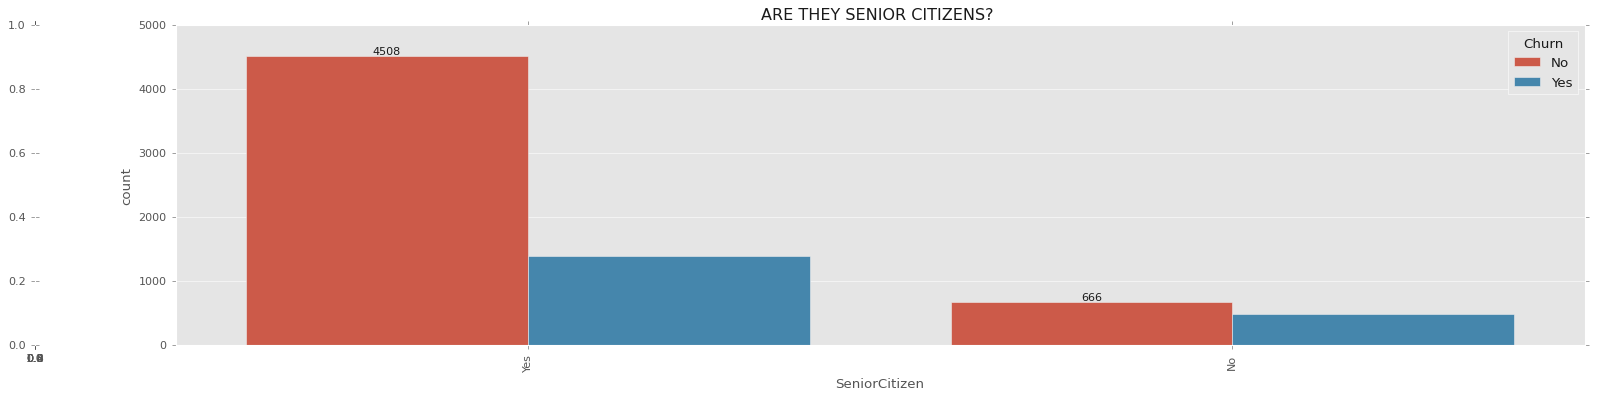

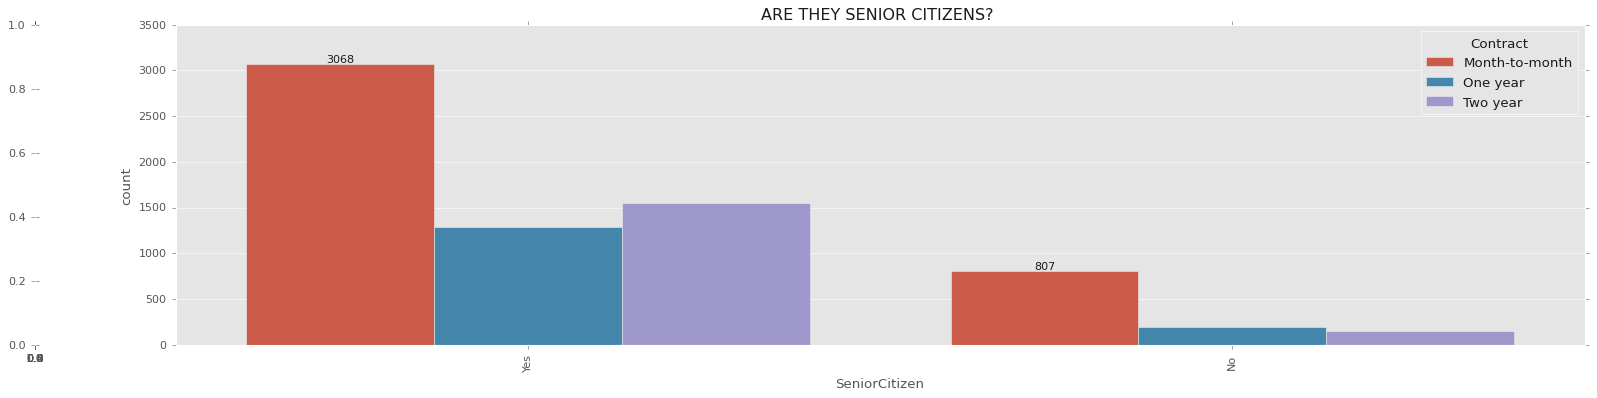

In [279]:
cols=["Dependents","Churn","Contract"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "SeniorCitizen", data = tele2, order =  tele2["SeniorCitizen"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'ARE THEY SENIOR CITIZENS? ')
    plt.show()






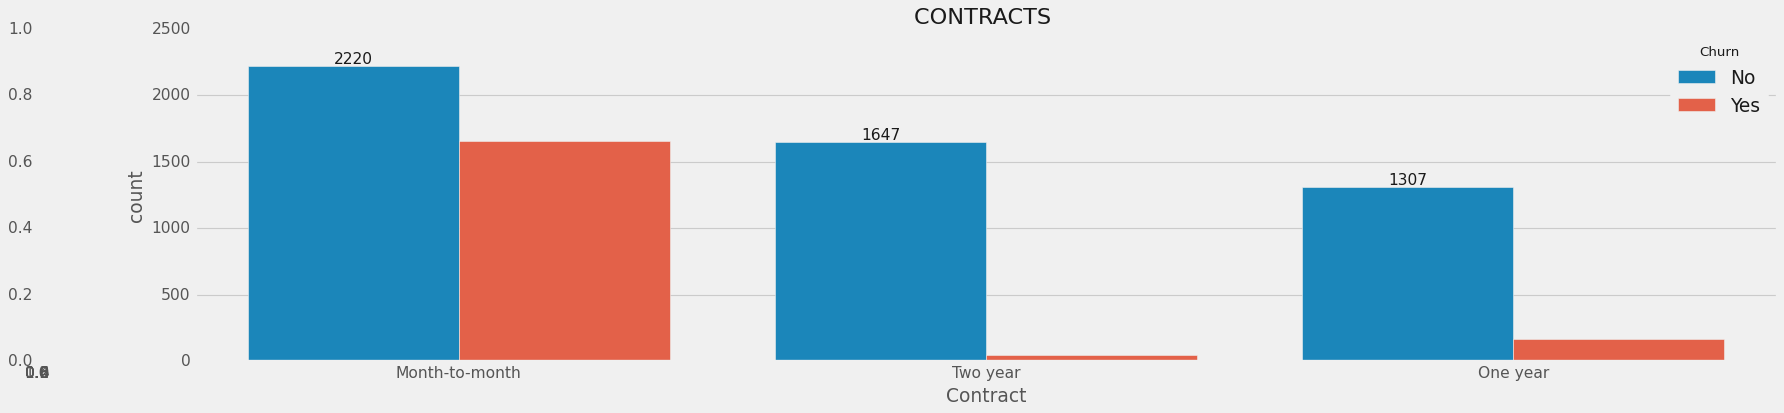

In [280]:
cols=["Churn"]
for col in cols:
    plt.style.use('fivethirtyeight')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "Contract", data = tele2, order =  tele2["Contract"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'CONTRACTS ')
    plt.show()






People with month-to-month contracts churn the most

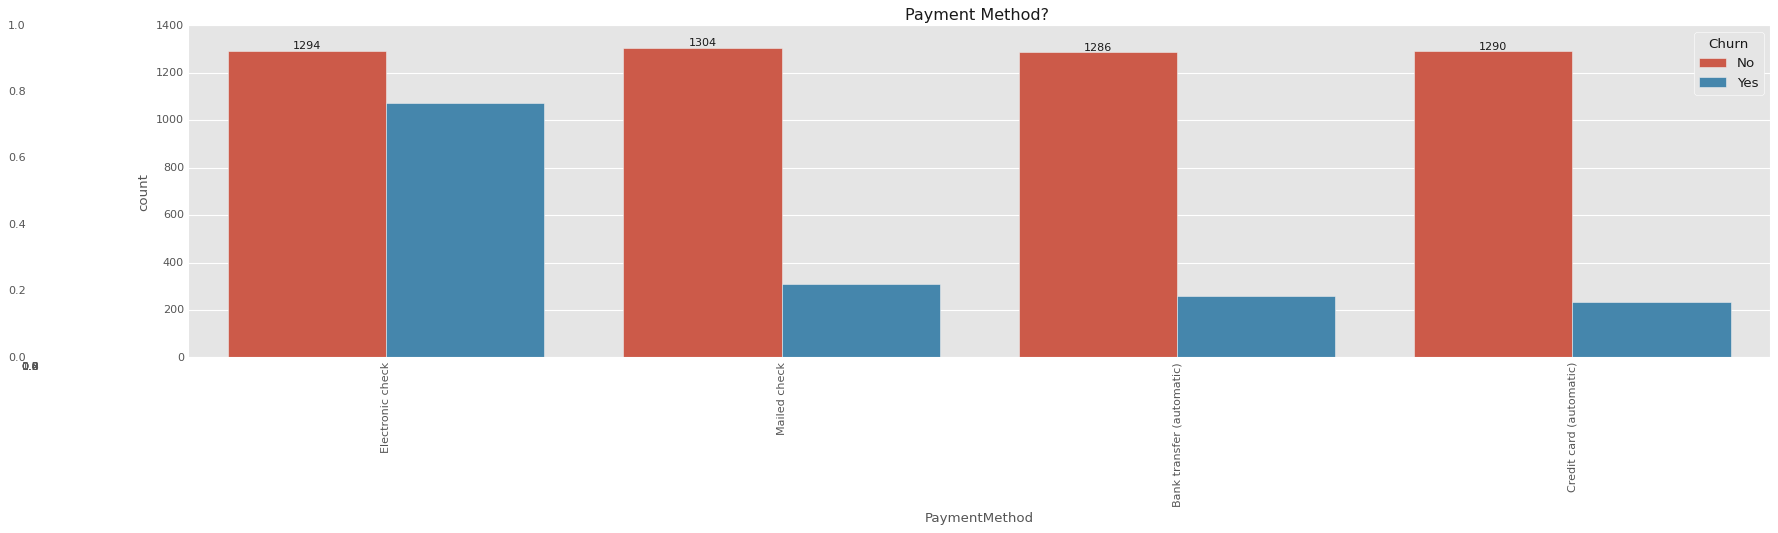

In [281]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "PaymentMethod", data = tele2, order =  tele2["PaymentMethod"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Payment Method? ')
    plt.show()






People who pay via electronic check churn the most

<Axes: xlabel='PaymentMethod', ylabel='TotalCharges'>

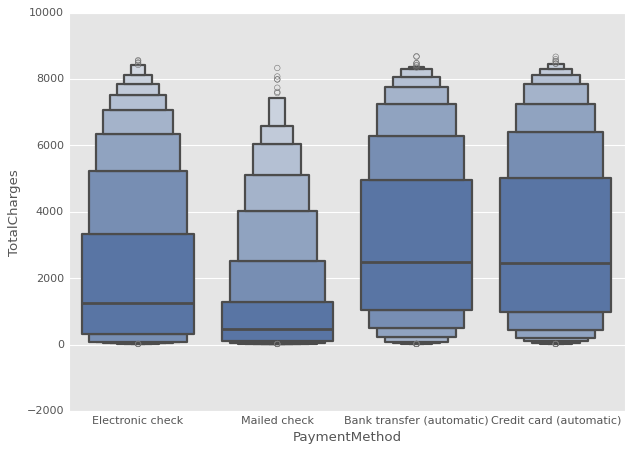

In [282]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
#plt.style.use('dark_background')
clarity_ranking=['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)']

sns.boxenplot(x="PaymentMethod", y="TotalCharges",
              color="b", order=clarity_ranking,
              scale="linear", data=tele2)

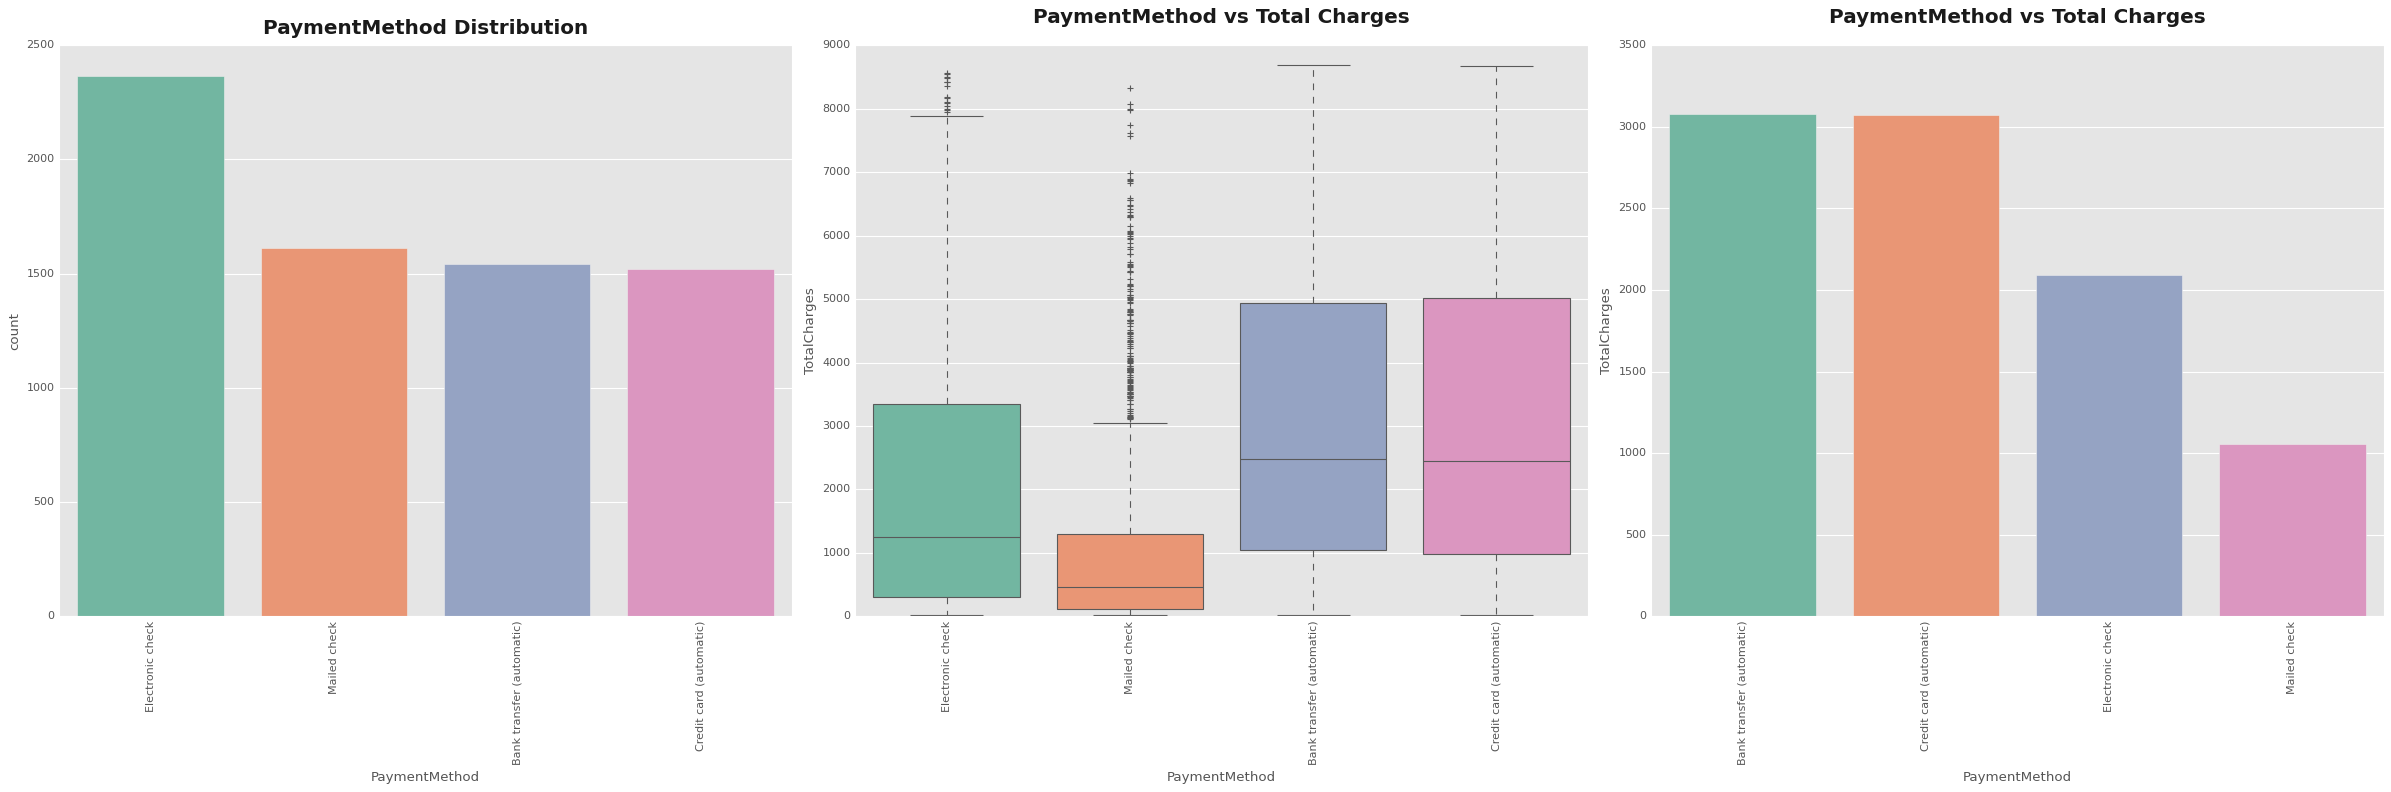

In [283]:
def categorical_visualization(cols):

    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=tele2,palette="Set2",order=tele2[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="TotalCharges",data=tele2,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(tele2.groupby(cols)["TotalCharges"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="TotalCharges",data=x,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("PaymentMethod")

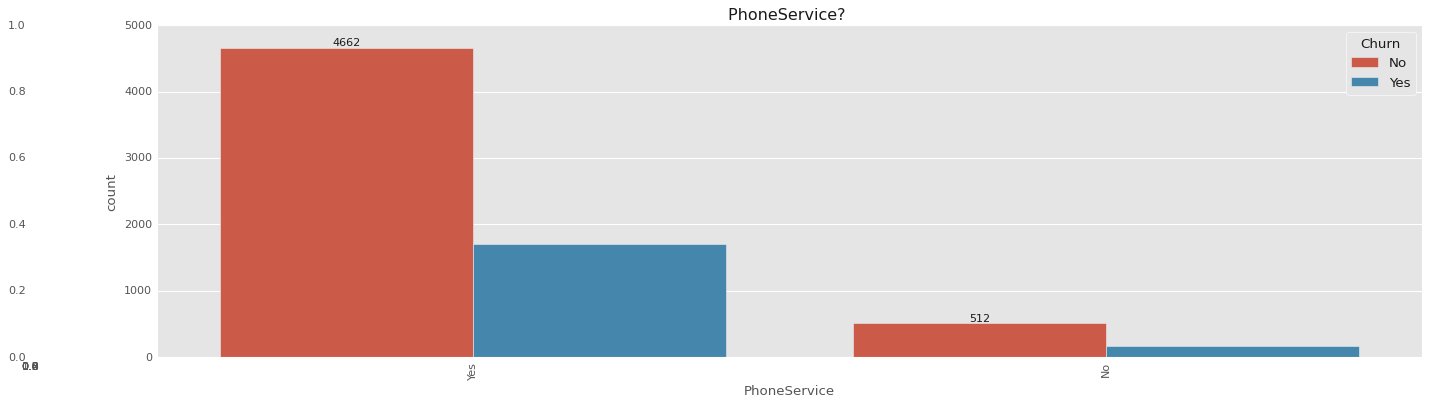

In [284]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(20, 5))
    ax = sns.countplot(x = "PhoneService", data = tele2, order =  tele2["PhoneService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'PhoneService? ')
    plt.show()






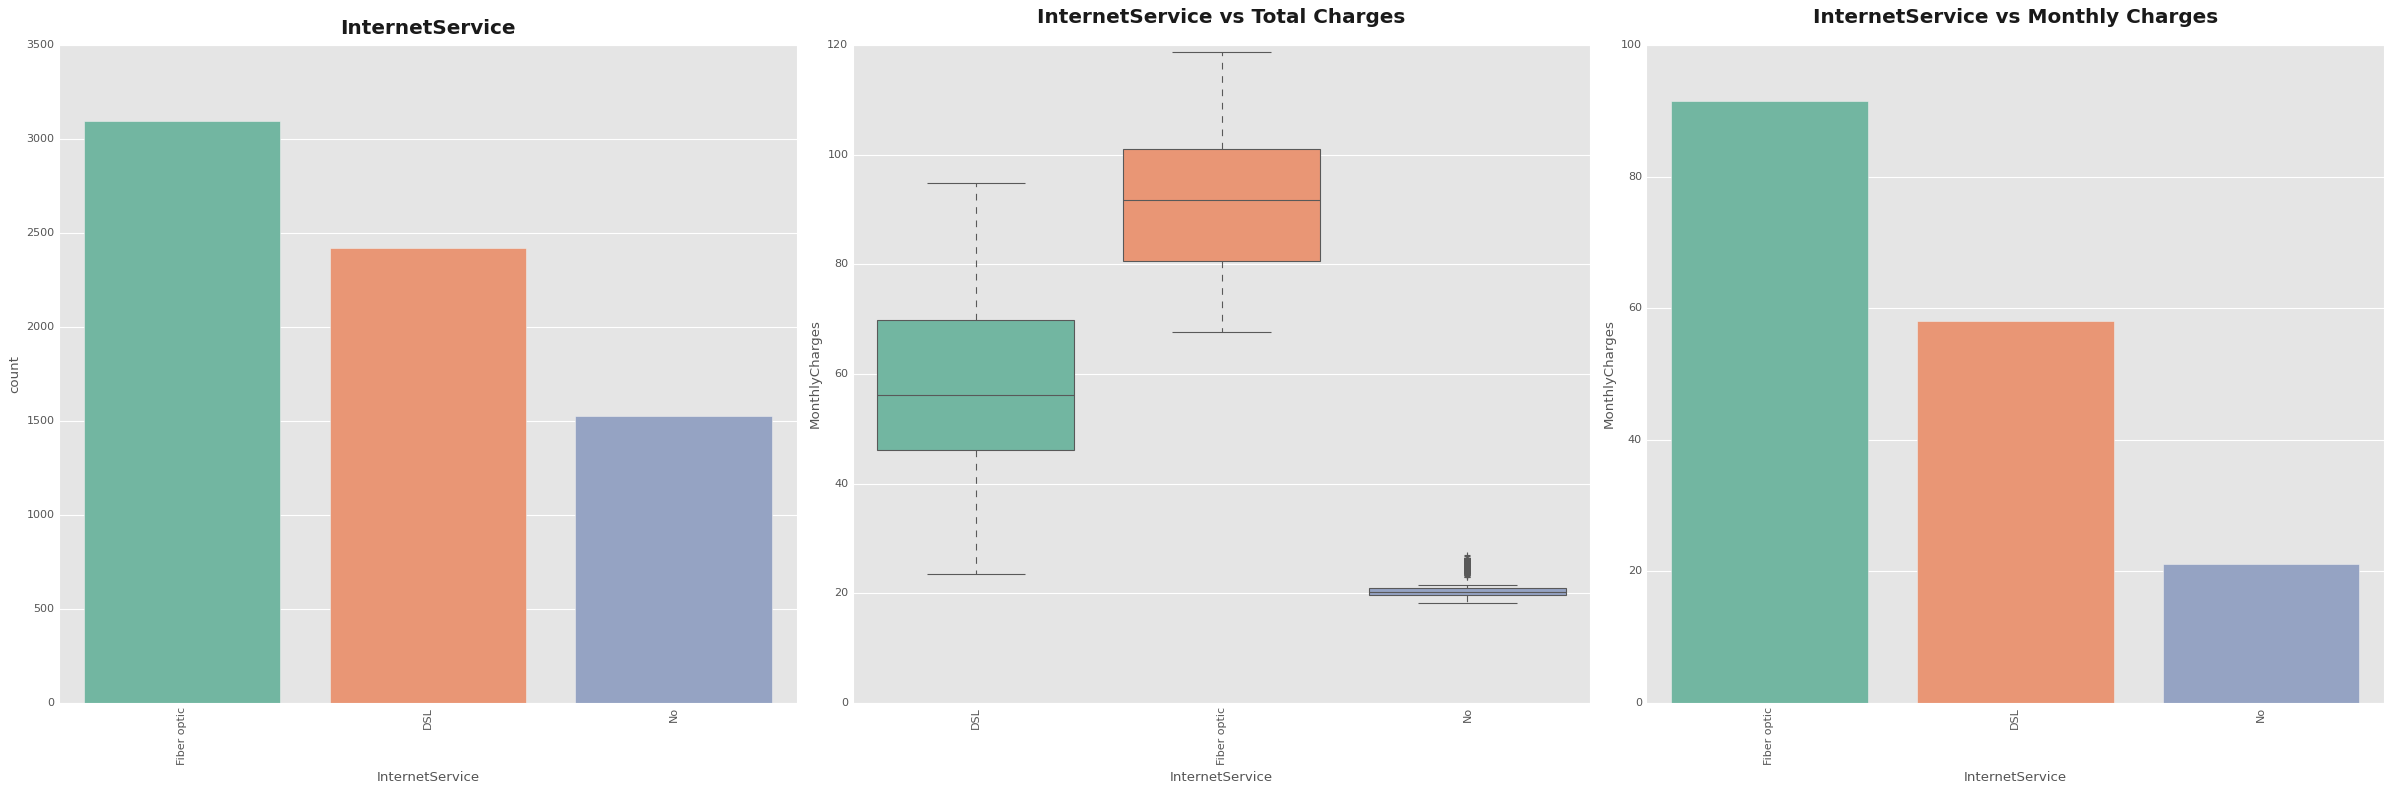

In [285]:
def categorical_visualization(cols):

    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=tele2,palette="Set2",order=tele2[cols].value_counts().index)
    plt.title(f"{cols}",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="MonthlyCharges",data=tele2,palette="Set2")
    plt.title(f"{cols} vs Total Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(tele2.groupby(cols)["MonthlyCharges"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="MonthlyCharges",data=x,palette="Set2")
    plt.title(f"{cols} vs Monthly Charges",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("InternetService")

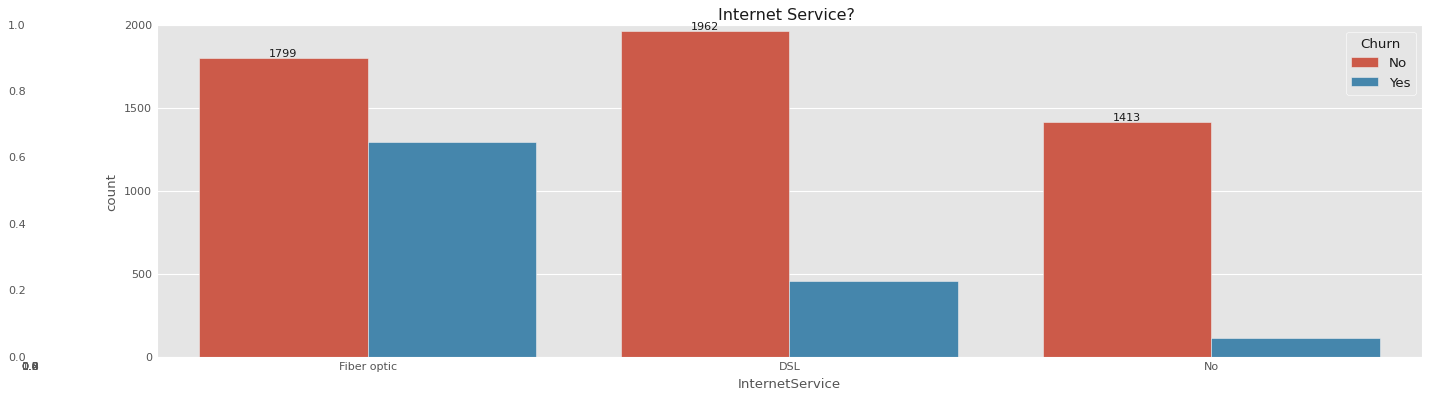

In [286]:
cols=["Churn"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(20, 5))
    ax = sns.countplot(x = "InternetService", data = tele2, order =  tele2["InternetService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'Internet Service? ')
    plt.show()






People who use Fibre optic churn the most

In [287]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

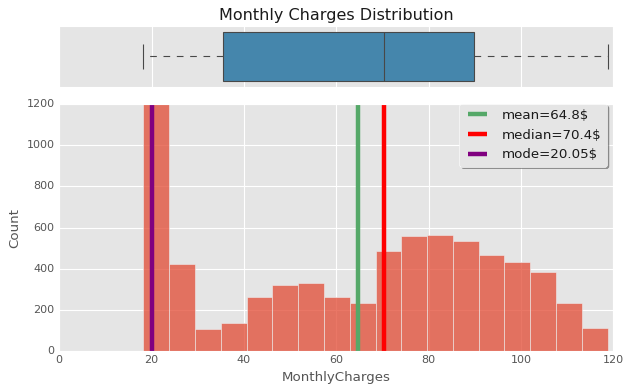

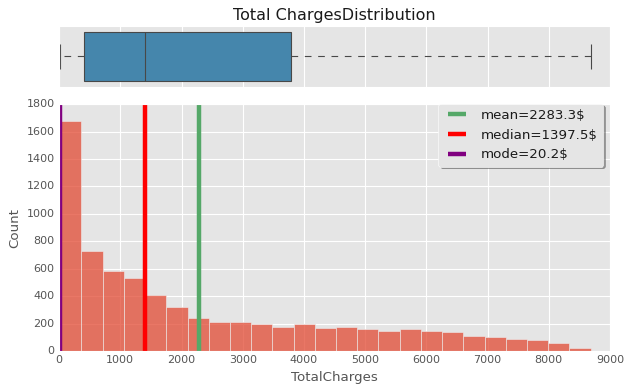

In [288]:
num_plot(tele2, 'MonthlyCharges', 'Monthly Charges Distribution','$')
num_plot(tele2, 'TotalCharges', 'Total ChargesDistribution','$')

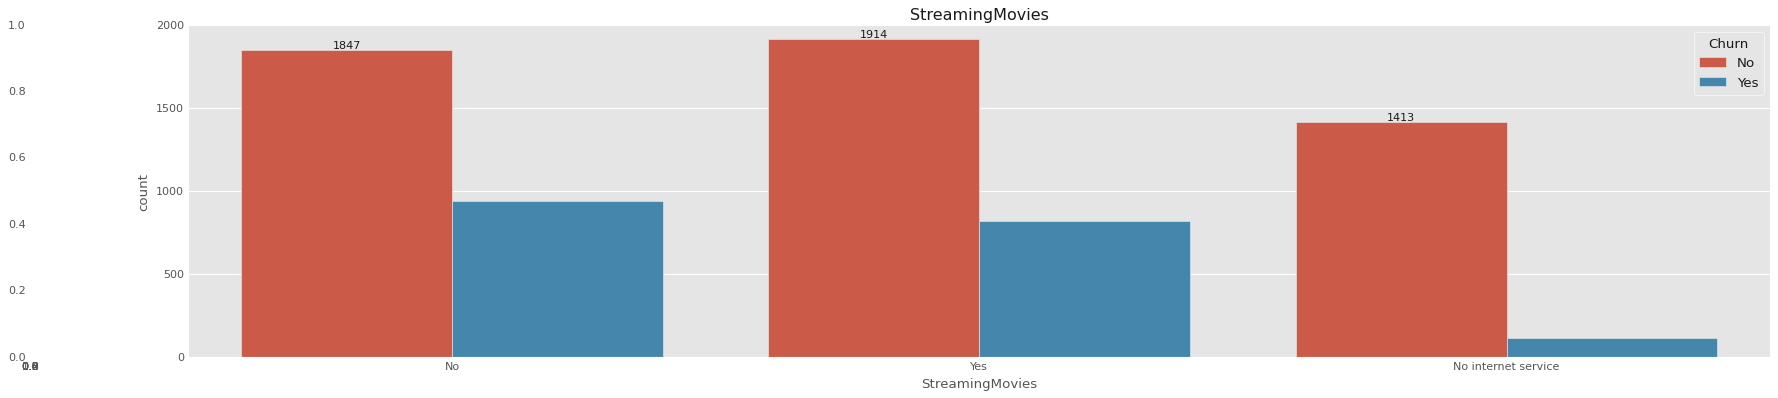

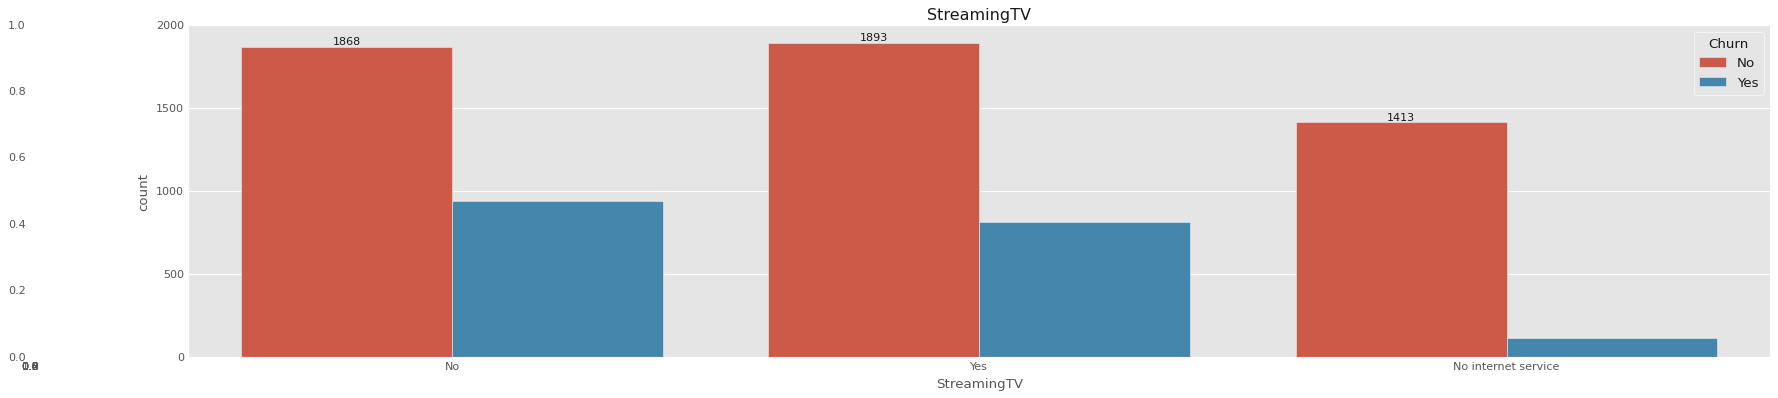

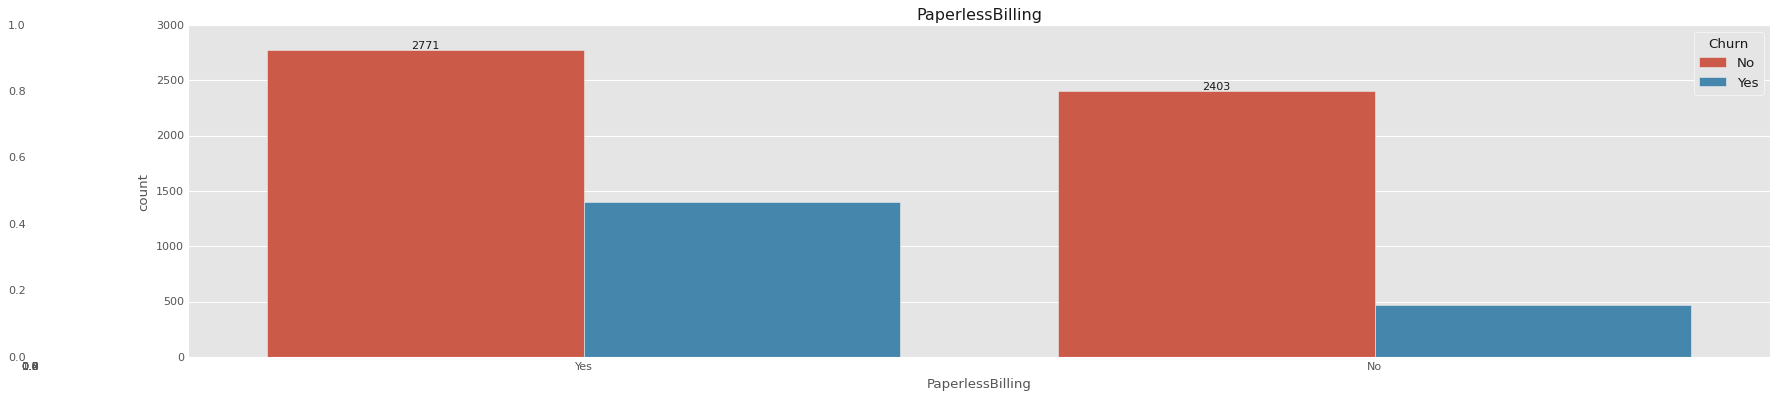

In [289]:
cols=["StreamingMovies","StreamingTV","PaperlessBilling"]
for col in cols:
    plt.style.use('ggplot')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = col, data = tele2, order =  tele2[col].value_counts().sort_values(ascending=False).index[0:],hue=tele["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'{col}')
    plt.show()






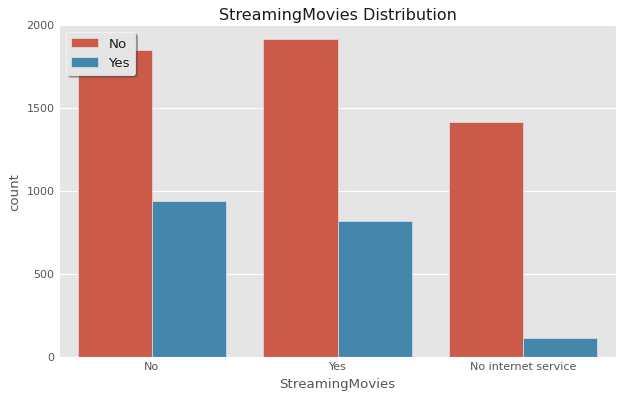

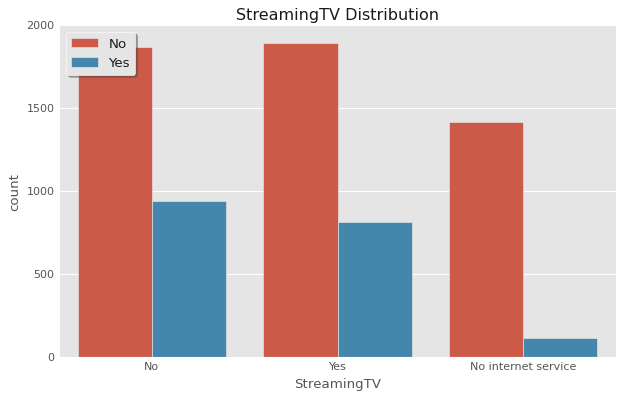

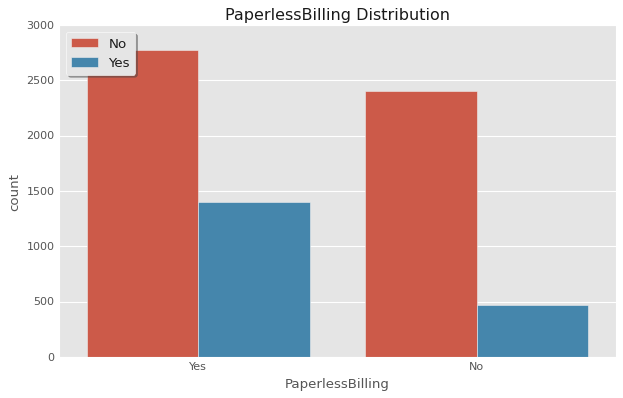

In [290]:
cols=["StreamingMovies","StreamingTV","PaperlessBilling"]
for col in cols:
    #plt.style.use('dark_background')
    fig, ax  = plt.subplots(figsize=(8,5))
    ax = sns.countplot(x = col, data = tele2, hue = tele2["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 00)
    ax.set_xlabel(f'{col}')
    plt.title(f'{col} Distribution')
    plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.show()

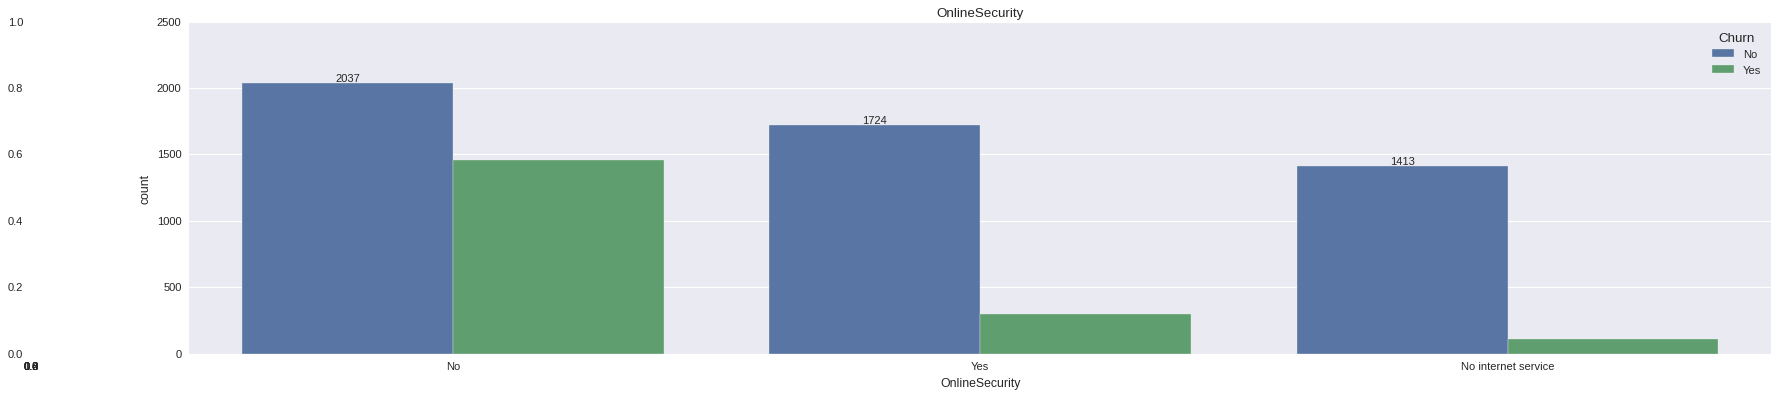

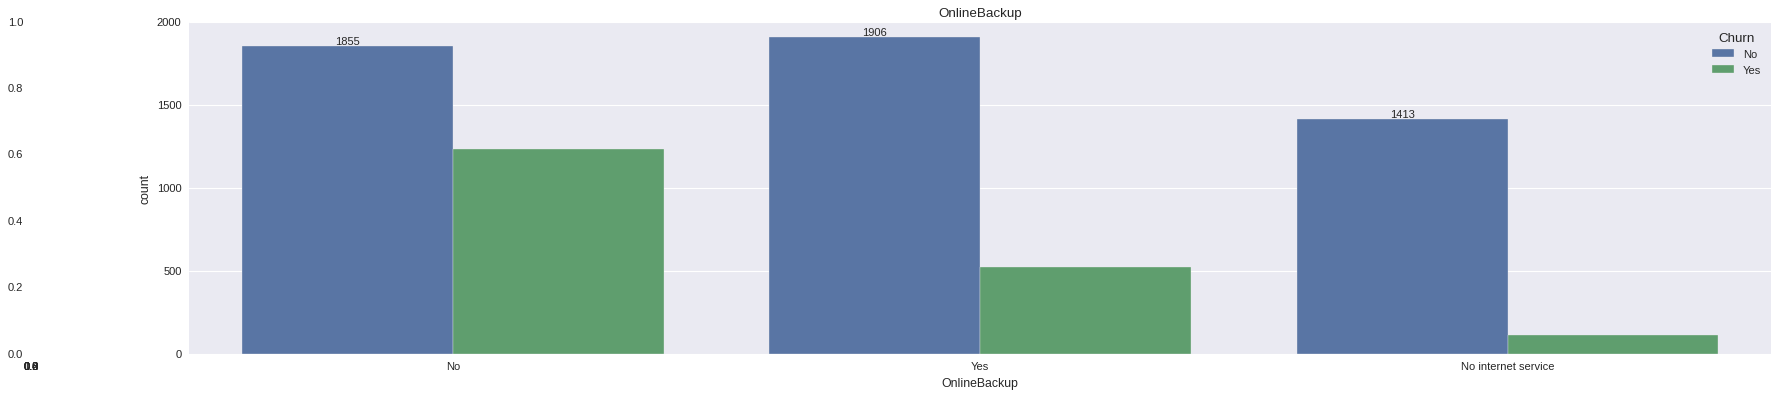

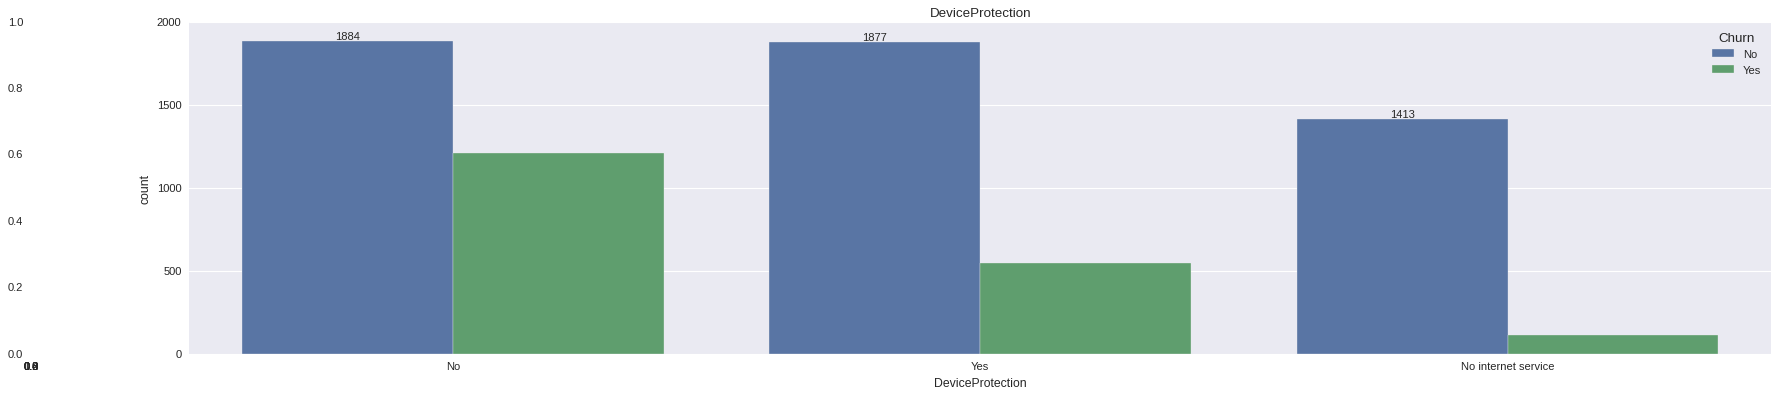

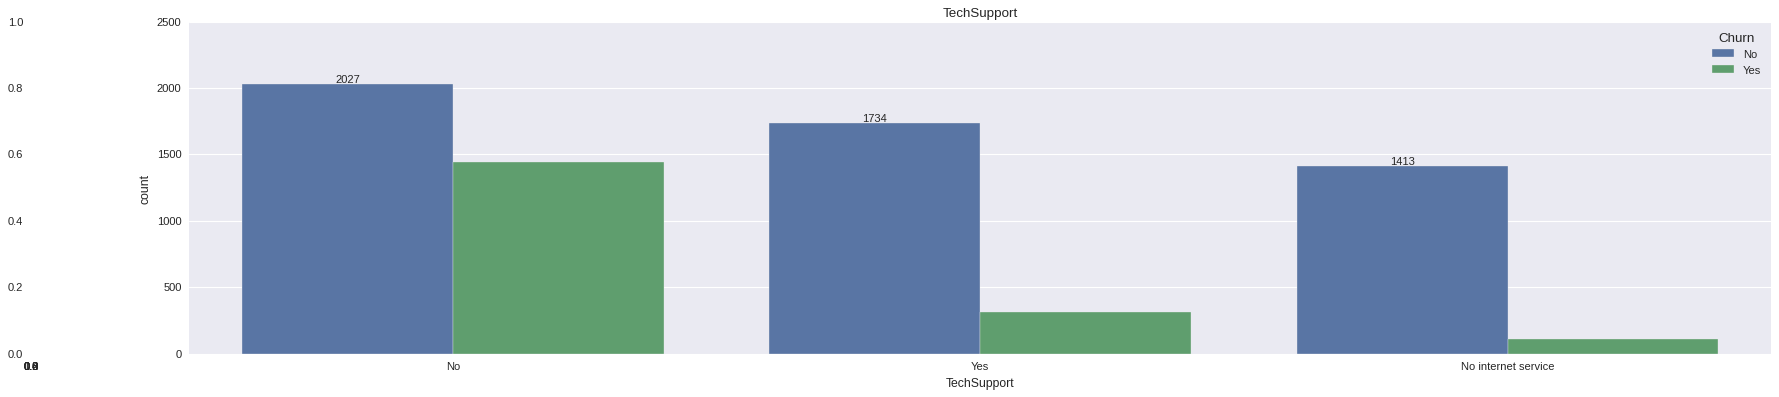

In [291]:
cols=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
for col in cols:
    plt.style.use('seaborn')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = col, data = tele2, order =  tele2[col].value_counts().sort_values(ascending=False).index[0:],hue=tele["Churn"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'{col}')
    plt.show()






In [292]:
tele3=tele2.copy()
tele3["Churn"]=tele3["Churn"].replace({
    "Yes":1,
    "No":0
})

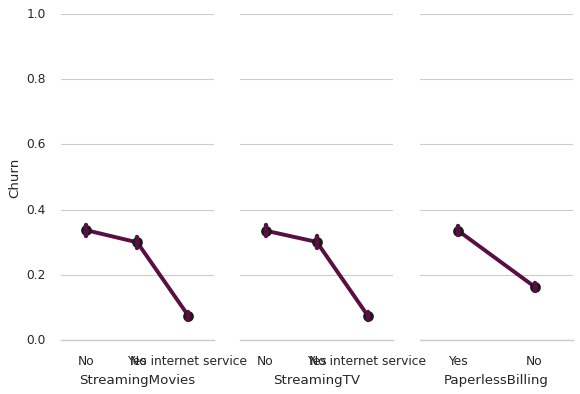

In [293]:
sns.set_theme(style="whitegrid")

# Load the example Titanic dataset
#titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(tele3, y_vars="Churn",
                 x_vars=["StreamingMovies","StreamingTV","PaperlessBilling"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

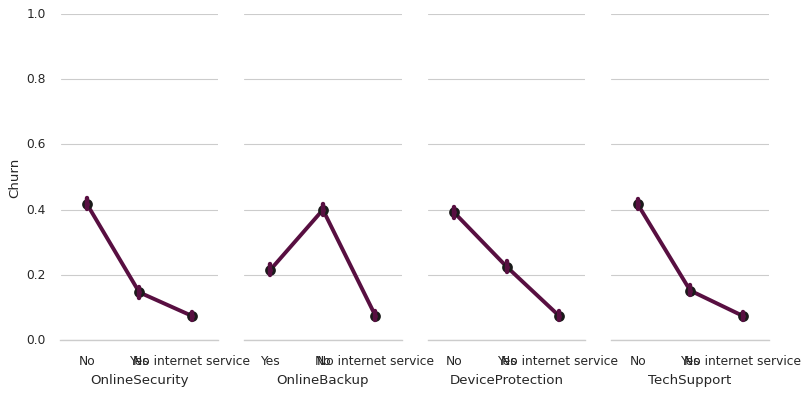

In [294]:
sns.set_theme(style="whitegrid")


g = sns.PairGrid(tele3, y_vars="Churn",
                 x_vars=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

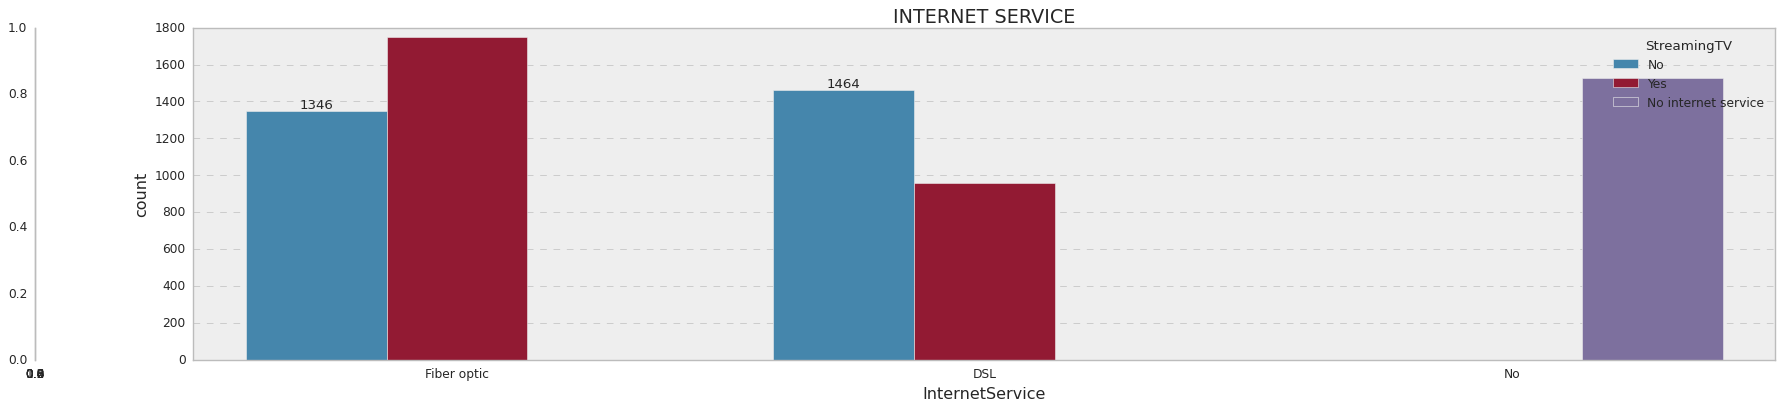

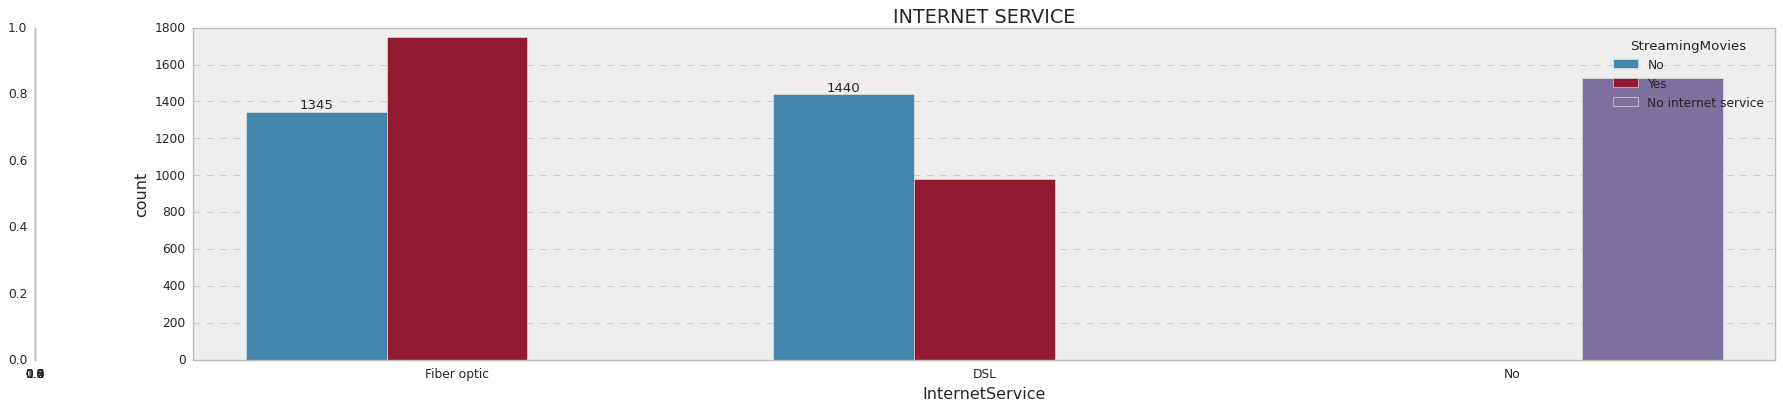

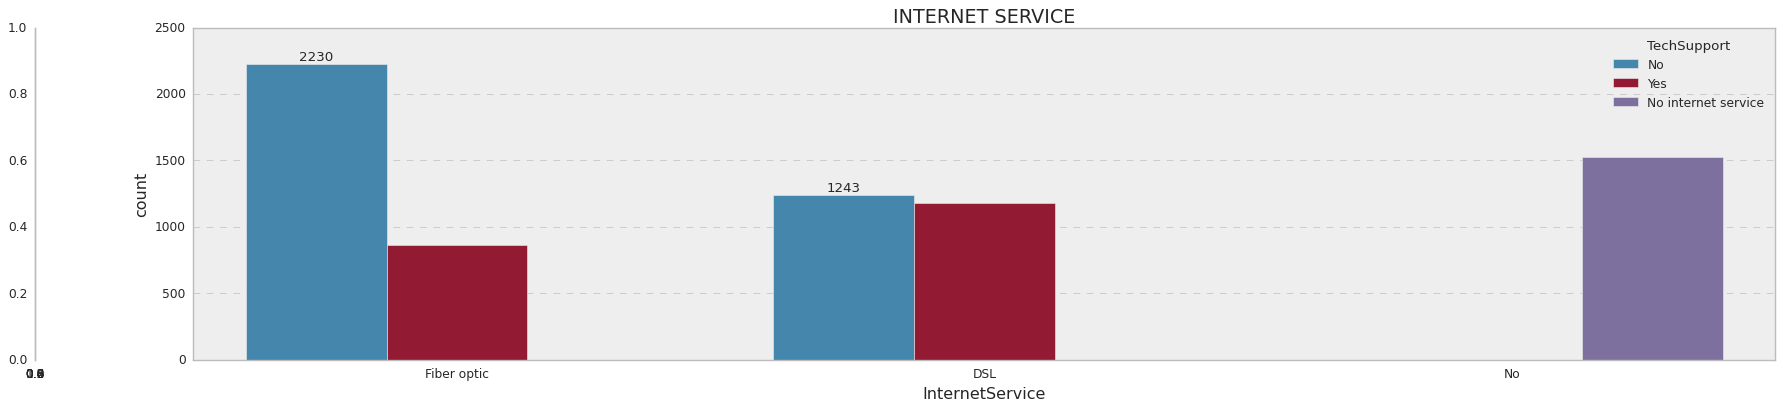

In [295]:
cols=["StreamingTV","StreamingMovies","TechSupport"]
for col in cols:
    plt.style.use('bmh')
    #sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
    ax = sns.countplot(x = "InternetService", data = tele2, order =  tele2["InternetService"].value_counts().sort_values(ascending=False).index[0:],hue=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.bar_label(ax.containers[0])
    plt.title(f'INTERNET SERVICE')
    plt.show()






In [296]:
tele2.dropna(subset=['TotalCharges'], inplace=True)
tele2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.8 years
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


In [297]:
print(tele2["tenure"].max())
print(tele2["tenure"].min())

72
1


In [298]:
print(len(tele2["tenure"].value_counts()))
print(len(tele2["years worked"].value_counts()))

72
52


In [299]:
tele5=tele2.copy()
tele5.drop("tenure",axis=1,inplace=True)

In [300]:
tele2["years worked"].value_counts()

years worked
less than a year    2058
6.0 years            362
5.8 years            214
1.2 years            175
5.9 years            170
1.8 years            153
2.2 years            151
5.2 years            142
4.2 years            136
3.8 years            135
4.8 years            132
2.8 years            129
1.0 years            117
3.2 years            115
1.1 years            109
5.7 years            100
5.6 years             98
1.5 years             97
2.0 years             94
5.5 years             89
2.9 years             88
1.4 years             87
1.9 years             85
5.3 years             80
1.3 years             80
4.3 years             80
4.7 years             80
2.1 years             79
5.0 years             76
5.1 years             76
5.4 years             76
1.6 years             73
2.5 years             72
2.4 years             72
1.7 years             71
3.4 years             70
4.4 years             70
2.7 years             69
4.5 years             68
3.9 years   

In [301]:
tele2.drop(["customerID","tenure"],axis=1,inplace=True)


In [302]:
tele2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,Female,Yes,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less than a year
1,Male,Yes,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.8 years
2,Male,Yes,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less than a year
3,Male,Yes,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.8 years
4,Female,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less than a year


<Axes: >

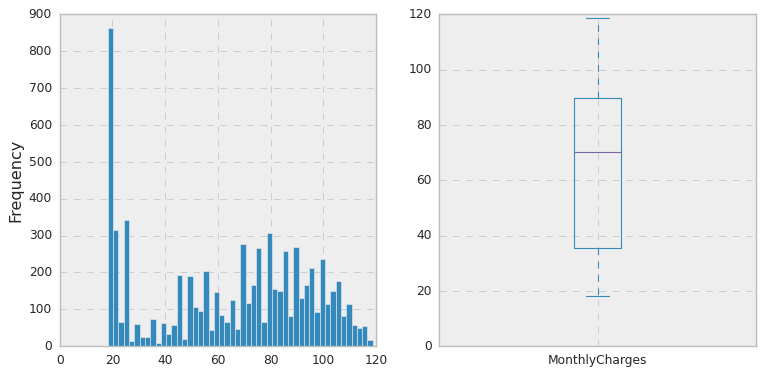

In [303]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
tele2["MonthlyCharges"].plot(kind="hist",bins=50)
plt.subplot(1,2,2)
tele2["MonthlyCharges"].plot(kind="box")

In [304]:
import numpy as np

def outliers_z_score(data):
    thres = 4
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in np.arange(2, thres, 0.5):
        for j in data:
            z_score = (j - mean) / std
            if np.abs(z_score) > i:
                outliers.append(j)
        print(f'Outliers for threshold of {i} = {outliers}')
        print(f'Number of outliers =',{len(outliers)})
        outliers = []  # Reset outliers list for the next threshold
    return outliers

outliers_z_score(tele2["TotalCharges"])


Outliers for threshold of 2.0 = [7895.15, 7382.25, 7251.7, 7076.35, 7853.7, 7099.0, 7107.0, 7459.05, 7611.85, 7303.05, 7930.55, 8129.3, 8041.65, 7405.5, 7878.3, 7008.15, 6823.4, 6962.85, 8126.65, 7007.6, 6858.9, 8468.2, 7611.55, 8404.9, 8003.8, 6989.45, 8399.15, 7379.8, 8248.5, 7966.9, 8220.4, 7422.1, 8071.05, 8306.05, 6976.75, 6819.45, 7943.45, 6985.65, 7246.15, 7085.5, 7882.25, 8196.4, 8065.65, 7616.0, 7250.15, 7589.8, 8476.5, 7015.9, 7511.65, 8310.55, 7984.15, 7848.5, 7039.45, 7118.9, 7532.15, 7849.85, 8046.85, 7159.7, 8333.95, 8093.15, 7413.55, 7159.05, 7168.25, 8317.95, 7544.0, 7530.8, 7962.2, 8127.6, 7133.25, 6840.95, 7412.25, 7869.05, 7227.45, 6998.95, 7213.75, 7002.95, 6873.75, 7508.55, 7447.7, 7082.45, 7031.3, 7035.6, 8375.05, 8100.55, 8013.55, 6827.5, 8078.1, 7108.2, 6929.4, 6937.95, 8086.4, 7657.4, 6885.75, 7261.25, 7040.85, 6825.65, 8477.7, 7382.85, 7455.45, 7554.05, 6841.45, 8477.6, 7133.45, 6994.8, 7550.3, 8564.75, 7537.5, 7482.1, 7028.5, 7111.3, 7349.35, 7240.65, 7711.25

[]

<Axes: ylabel='Frequency'>

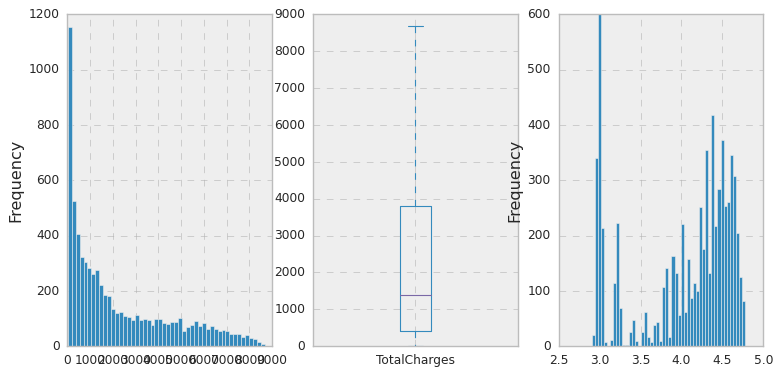

In [305]:

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
tele2["TotalCharges"].plot(kind="hist",bins=50)
plt.subplot(1,3,2)
tele2["TotalCharges"].plot(kind="box")
plt.subplot(1,3,3)
np.log(tele2["MonthlyCharges"]).plot(kind="hist",bins=50)


In [306]:
import numpy as np

def outliers_z_score(data):
    thres = 4
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in np.arange(2, thres, 0.5):
        for j in data:
            z_score = (j - mean) / std
            if np.abs(z_score) > i:
                outliers.append(j)
        print(f'Outliers for threshold of {i} = {outliers}')
        print(f'Number of outliers =',{len(outliers)})
        outliers = []  # Reset outliers list for the next threshold
    return outliers

outliers_z_score(tele2["MonthlyCharges"])


Outliers for threshold of 2.0 = []
Number of outliers = {0}
Outliers for threshold of 2.5 = []
Number of outliers = {0}
Outliers for threshold of 3.0 = []
Number of outliers = {0}
Outliers for threshold of 3.5 = []
Number of outliers = {0}


[]

In [307]:
num_col=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',"Churn","years worked"]

In [308]:
pd.get_dummies(tele2,num_col,drop_first=True)

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,years worked_5.1 years,years worked_5.2 years,years worked_5.3 years,years worked_5.4 years,years worked_5.5 years,years worked_5.6 years,years worked_5.7 years,years worked_5.8 years,years worked_5.9 years,years worked_6.0 years,years worked_less than a year
0,29.85,29.85,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True
1,56.95,1889.50,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False
2,53.85,108.15,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True
3,42.30,1840.75,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False
4,70.70,151.65,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False
7039,103.20,7362.90,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True,False
7040,29.60,346.45,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True
7041,74.40,306.60,True,False,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False,True


In [309]:
from sklearn.preprocessing import LabelEncoder

In [310]:
en=LabelEncoder()

In [311]:
for cols in num_col:
    tele2[cols]=en.fit_transform(tele2[cols])
tele2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,years worked
0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,51
1,1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,18
2,1,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,51
3,1,1,0,0,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,28
4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,51


In [312]:
#tele2.dropna(subset=['TotalCharges'], inplace=True)

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

logistic=LogisticRegression(max_iter=100000)
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()
#grid_search=GridSearchCV()
clf=MultinomialNB()
svm=SVC()
#grid_search=GridSearchCV()
gus = GaussianNB()
ben = BernoulliNB(alpha=0.1,binarize=0.1)
knn=KNeighborsClassifier(n_neighbors=5)


In [314]:
minmax=MinMaxScaler()
x=tele2.drop("Churn",axis=1)
y=tele2["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.8)
x_train=minmax.fit_transform(x_train)
x_test=minmax.transform(x_test)

In [315]:
print(x_train.shape)
print(x_test.shape)

(1406, 19)
(5626, 19)


https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/notebook

# NEW

In [316]:
models=[logistic,tree,forest,ada,xgb,svm,gus,ben,knn]
model_names=["Logistic","Decision tree","Random Forest","AdaBoost","XGBoost","SVM","GaussianNB","BernoulliNB","KNN"]
scores=[]
for name,model in zip(model_names,models):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score=accuracy_score(y_test,y_pred)
  con=confusion_matrix(y_test,y_pred)
  class_report=classification_report(y_test,y_pred)
  scores.append(score)
  print(f'The accuracy score for {name} algorithm is {round(score,2)}')
  print("\n")
  print(f'The confusion matrix for {name} algorithm is \n{con}')
  print("\n")
  print(f'The classification report for {name} algorithm is \n{class_report}')
pd.DataFrame(scores,index=model_names,columns=["Score"])





The accuracy score for Logistic algorithm is 0.79


The confusion matrix for Logistic algorithm is 
[[3677  471]
 [ 683  795]]


The classification report for Logistic algorithm is 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4148
           1       0.63      0.54      0.58      1478

    accuracy                           0.79      5626
   macro avg       0.74      0.71      0.72      5626
weighted avg       0.79      0.79      0.79      5626

The accuracy score for Decision tree algorithm is 0.73


The confusion matrix for Decision tree algorithm is 
[[3342  806]
 [ 725  753]]


The classification report for Decision tree algorithm is 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4148
           1       0.48      0.51      0.50      1478

    accuracy                           0.73      5626
   macro avg       0.65      0.66      0.65      5626
weighted avg       0.7

,Score
Logistic,0.794881
Decision tree,0.727871
Random Forest,0.789549
AdaBoost,0.790793
XGBoost,0.772307
SVM,0.788127
GaussianNB,0.746178
BernoulliNB,0.745290
KNN,0.748489


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [317]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

In [318]:
#for randon forest
rfe=RFE(forest,n_features_to_select=10)
rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [319]:
print(rfe.get_feature_names_out())
print(x.columns[rfe.support_])

print(x_train.shape)
print(x_test.shape)


x_rfe_train=rfe.transform(x_train)
x_rfe_test=rfe.transform(x_test)

print(x_rfe_train.shape)
print(x_rfe_test.shape)

['x0' 'x2' 'x7' 'x8' 'x10' 'x13' 'x15' 'x16' 'x17' 'x18']
Index(['gender', 'Partner', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'years worked'],
      dtype='object')
(1406, 19)
(5626, 19)
(1406, 10)
(5626, 10)


In [320]:
forest.fit(x_rfe_train,y_train)
y_pred=forest.predict(x_rfe_test)
score=accuracy_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

print(f'The accuracy score for Random Forest algorithm is {round(score,2)}')
print("\n")
print(f'The confusion matrix for Random Forest algorithm is \n{con}')
print("\n")
print(f'The classification report for Random Forest algorithm is \n{class_report}')

The accuracy score for Random Forest algorithm is 0.78


The confusion matrix for Random Forest algorithm is 
[[3662  486]
 [ 761  717]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4148
           1       0.60      0.49      0.53      1478

    accuracy                           0.78      5626
   macro avg       0.71      0.68      0.69      5626
weighted avg       0.77      0.78      0.77      5626



The accuracy score for Random Forest algorithm is 0.78


The confusion matrix for Random Forest algorithm is 
[[3831  317]
 [ 943  535]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4148
           1       0.63      0.36      0.46      1478

    accuracy                           0.78      5626
   macro avg       0.72      0.64      0.66      5626
weighted avg       0.76      0.78      0.75      5626



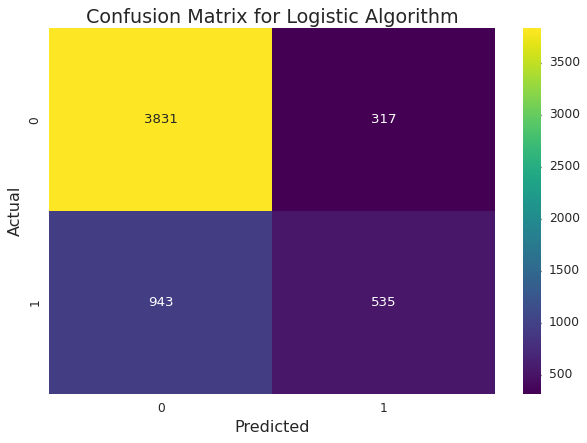

The accuracy score for Random Forest algorithm is 0.75


The confusion matrix for Random Forest algorithm is 
[[3837  311]
 [1120  358]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4148
           1       0.54      0.24      0.33      1478

    accuracy                           0.75      5626
   macro avg       0.65      0.58      0.59      5626
weighted avg       0.71      0.75      0.71      5626



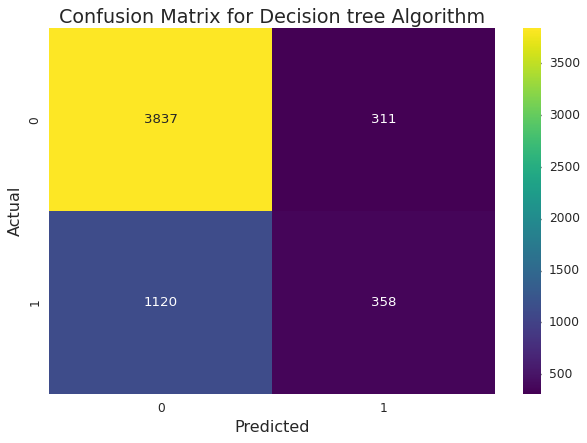

The accuracy score for Random Forest algorithm is 0.78


The confusion matrix for Random Forest algorithm is 
[[3714  434]
 [ 780  698]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4148
           1       0.62      0.47      0.53      1478

    accuracy                           0.78      5626
   macro avg       0.72      0.68      0.70      5626
weighted avg       0.77      0.78      0.77      5626



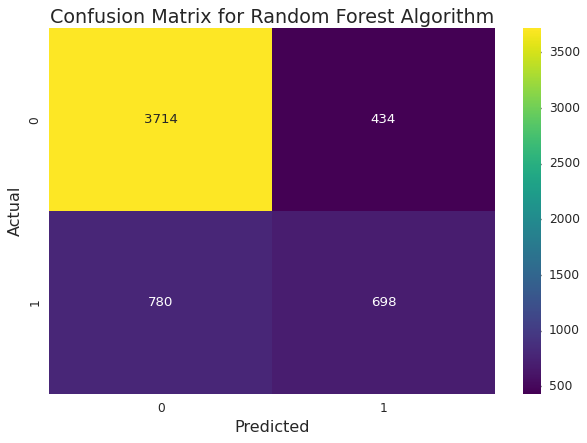

The accuracy score for Random Forest algorithm is 0.78


The confusion matrix for Random Forest algorithm is 
[[3736  412]
 [ 846  632]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4148
           1       0.61      0.43      0.50      1478

    accuracy                           0.78      5626
   macro avg       0.71      0.66      0.68      5626
weighted avg       0.76      0.78      0.76      5626



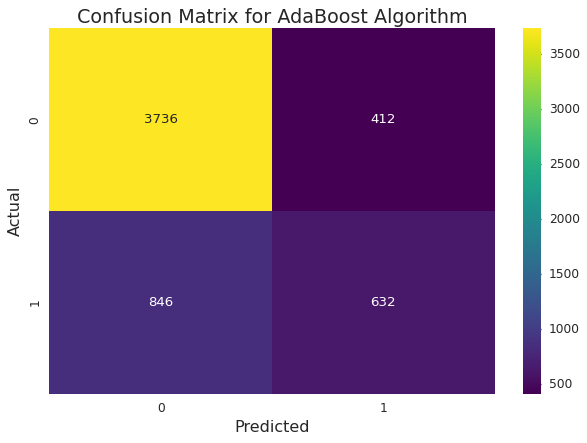

The accuracy score for Random Forest algorithm is 0.72


The confusion matrix for Random Forest algorithm is 
[[4061   87]
 [1462   16]]


The classification report for Random Forest algorithm is 
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      4148
           1       0.16      0.01      0.02      1478

    accuracy                           0.72      5626
   macro avg       0.45      0.49      0.43      5626
weighted avg       0.58      0.72      0.62      5626



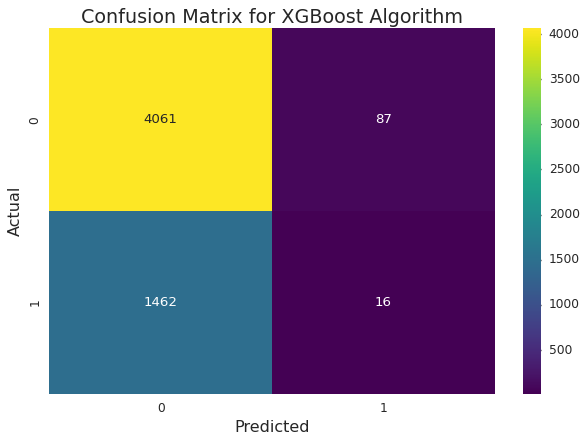

,Score
Logistic,0.776040
Decision tree,0.745645
Random Forest,0.784216
AdaBoost,0.776395
XGBoost,0.724671


In [321]:
models=[logistic,tree,forest,ada,xgb]
model_names=["Logistic","Decision tree","Random Forest","AdaBoost","XGBoost"]
scores=[]
for model,name in zip(models,model_names):
  rfe=RFE(model,n_features_to_select=10)
  rfe.fit(x_train,y_train)
  x_train_tranformed=rfe.transform(x_train)
  x_test_transformed=rfe.transform(x_test)

  model.fit(x_train_tranformed,y_train)
  y_pred=forest.predict(x_test_transformed)
  score=accuracy_score(y_test,y_pred)
  con=confusion_matrix(y_test,y_pred)
  class_report=classification_report(y_test,y_pred)
  scores.append(score)

  print(f'The accuracy score for Random Forest algorithm is {round(score,2)}')
  print("\n")
  print(f'The confusion matrix for Random Forest algorithm is \n{con}')
  print("\n")
  print(f'The classification report for Random Forest algorithm is \n{class_report}')


  #sns.set(font_scale=1.2)
  sns.heatmap(con, annot=True, fmt="d", cmap="viridis")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f'Confusion Matrix for {name} Algorithm')
  plt.show()
pd.DataFrame(scores,index=model_names,columns=["Score"])

In [322]:
from sklearn.model_selection import cross_val_score
models=[logistic,tree,forest,ada,xgb]
scores=[]

model_names=["Logistic","Decision tree","Random Forest","AdaBoost","XGBoost"]
for model,name in zip(models,model_names):
  cross=cross_val_score(model,x_train,y_train,cv=5).mean()
  print(f'The cross validation score for {name} algorithm is {cross}')
  scores.append(cross)
pd.DataFrame(scores,index=model_names,columns=["Score"])





The cross validation score for Logistic algorithm is 0.7816789076499836
The cross validation score for Decision tree algorithm is 0.7091214255066758
The cross validation score for Random Forest algorithm is 0.7681532520632999
The cross validation score for AdaBoost algorithm is 0.7802478483632417
The cross validation score for XGBoost algorithm is 0.7482193786123521


,Score
Logistic,0.781679
Decision tree,0.709121
Random Forest,0.768153
AdaBoost,0.780248
XGBoost,0.748219


In [323]:
(x_train.shape[1])

19

In [324]:
## lets use nn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

from tensorflow.keras.layers import BatchNormalization, Input, Activation, Dropout, Dense

In [325]:
def model():
  inputs=Input(shape=(x_train.shape[1],))
  x=Dense(64,activation="relu")(inputs)
  x=Dense(32,activation="relu")(x)
  x=Dense(16,activation="relu")(x)
  x=Dense(216,activation="relu")(x)
  x=Dense(8,activation="relu")(x)
  x=Dense(32,activation="relu")(x)
  x=Dropout(0.2)(x)
  x=Dense(16,activation="relu")(x)
  x=Dense(8,activation="relu")(x)
  x=Dropout(0.5)(x)
  x=Dense(16,activation="relu")(x)
  x=Dense(128,activation="relu")(x)
  x=Dense(4,activation="relu")(x)
  outputs=Dense(1,activation="sigmoid")(x)

  model=keras.Model(inputs=inputs,outputs=outputs)

  return model

In [326]:
model=model()


In [327]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_13 (Dense)            (None, 64)                1280      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 216)               3672      
                                                                 
 dense_17 (Dense)            (None, 8)                 1736      
                                                                 
 dense_18 (Dense)            (None, 32)                288 

In [328]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [329]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
44/44 [==============================] - 5s 24ms/step - loss: 0.5759 - accuracy: 0.7219 - val_loss: 0.5001 - val_accuracy: 0.7373
Epoch 2/100
44/44 [==============================] - 1s 14ms/step - loss: 0.5068 - accuracy: 0.7219 - val_loss: 0.4626 - val_accuracy: 0.7373
Epoch 3/100
44/44 [==============================] - 1s 14ms/step - loss: 0.4738 - accuracy: 0.7219 - val_loss: 0.4801 - val_accuracy: 0.7373
Epoch 4/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4744 - accuracy: 0.7219 - val_loss: 0.4884 - val_accuracy: 0.7373
Epoch 5/100
44/44 [==============================] - 1s 14ms/step - loss: 0.4486 - accuracy: 0.7240 - val_loss: 0.4743 - val_accuracy: 0.7373
Epoch 6/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4725 - accuracy: 0.7333 - val_loss: 0.4692 - val_accuracy: 0.7373
Epoch 7/100
44/44 [==============================] - 1s 14ms/step - loss: 0.4454 - accuracy: 0.7233 - val_loss: 0.4580 - val_accuracy: 0.7807
Epoch 

In [330]:
model.evaluate(x_test,y_test)

176/176 [==============================] - 1s 4ms/step - loss: 0.8184 - accuracy: 0.7058


[0.8184278607368469, 0.7058300971984863]

In [332]:
pred=np.where(model.predict(x_test)>0.5,1,0)
pred

176/176 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

The accuracy score for the NN is 0.71


The confusion matrix for NN is 
[[2944 1204]
 [ 451 1027]]


The classification report for NN is 
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4148
           1       0.46      0.69      0.55      1478

    accuracy                           0.71      5626
   macro avg       0.66      0.70      0.67      5626
weighted avg       0.76      0.71      0.72      5626



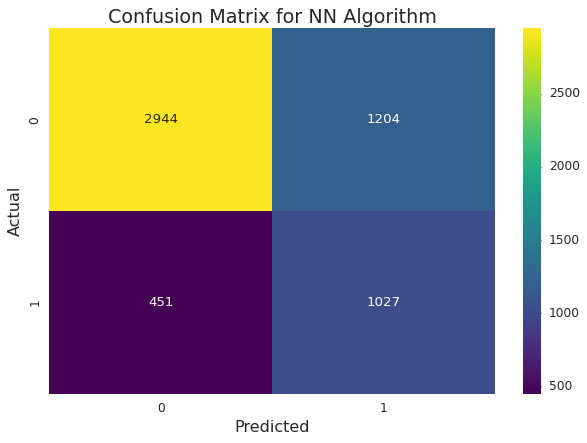

In [333]:
score=accuracy_score(y_test,pred)
con=confusion_matrix(y_test,pred)
class_report=classification_report(y_test,pred)

print(f'The accuracy score for the NN is {round(score,2)}')
print("\n")
print(f'The confusion matrix for NN is \n{con}')
print("\n")
print(f'The classification report for NN is \n{class_report}')

sns.heatmap(con, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f'Confusion Matrix for NN Algorithm')
plt.show()